[View in Colaboratory](https://colab.research.google.com/github/ericaggrey17/Emotion-Classification/blob/master/vgg16_emotionclassifier.ipynb)

  ## VGG16 EMOTION CLASSIFIER USING ROCHESTER DEEP_EMOTION DATSET





In [6]:
!pip install torch torchvision

    100% |████████████████████████████████| 519.5MB 27kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x58518000 @  0x7fd1e9e382a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
    100% |████████████████████████████████| 61kB 21.5MB/s 
    100% |████████████████████████████████| 2.0MB 4.4MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


Mounting Gdrive on Collab 

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


**Checking if drive was mounted**

In [0]:
!rm -r sample_data

In [0]:
!mkdir train valid

In [0]:
!mkdir ./train/amusement ./train/anger  ./train/awe    ./train/contentment    ./train/disgust   ./train/excitement  ./train/fear    ./train/sadnesss

In [0]:
!mkdir ./valid/amusement ./valid/anger  ./valid/awe    ./valid/contentment    ./valid/disgust   ./valid/excitement  ./valid/fear    ./valid/sadnesss


In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving agg.zip to agg.zip
User uploaded file "agg.zip" with length 1612706 bytes


In [7]:
!unzip agg.zip

Archive:  agg.zip
  inflating: amusement_1st_1000.csv  
  inflating: amusement_1st_ins_1000.csv  
  inflating: amusement_2nd_1000.csv  
  inflating: amusement_3rd_1000.csv  
  inflating: amusement_4th_2000.csv  
  inflating: amusement_5th_2000.csv  
  inflating: amusement_6th_3000.csv  
  inflating: anger_1st_1000.csv      
  inflating: anger_1st_ins_1000.csv  
  inflating: anger_2nd_1000.csv      
  inflating: anger_3rd_1000.csv      
  inflating: anger_4th_2000.csv      
  inflating: anger_5th_2000.csv      
  inflating: anger_6th_3000.csv      
  inflating: awe_1st_1000.csv        
  inflating: awe_1st_ins_1000.csv    
  inflating: awe_2nd_1000.csv        
  inflating: awe_3rd_1000.csv        
  inflating: awe_4th_2000.csv        
  inflating: awe_5th_2000.csv        
  inflating: awe_6th_3000.csv        
  inflating: contentment_1st_1000.csv  
  inflating: contentment_1st_ins_1000.csv  
  inflating: contentment_2nd_1000.csv  
  inflating: contentment_3rd_1000.csv  
  inflating: con

** Python imports used in the program**

In [0]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as tranforms
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas
import matplotlib.image as mpimg
import requests

**Download Data to Gdrive**

In [0]:
'''
count = 1
listOfFiles = os.listdir('.') 
for file in listOfFiles:
  csvpath = os.path.join('./'+ file)
  colnames = ['name', 'url', 'n', 'nn']
  data = pandas.read_csv(csvpath, names=colnames)
  names = data.name.tolist()
  name = names[8]
  urls = data.url.tolist()
  for url in urls:
    image_name = name +'/'+ str(count)+'.jpg'
    r = requests.get(url)
    with open(image_name, 'wb') as f:
        for chunk in r.iter_content():
            f.write(chunk)
    count = count + 1       
    
  '''

In [0]:
def ReadToFdr(csv,folder):
  colnames = ['name', 'url', 'n', 'nn']
  data = pandas.read_csv(csv, names=colnames)
  urls = data.url.tolist()
  count = 1
  for url in urls:
    image_name = folder +'/'+ str(count)+'.jpg'
    r = requests.get(url)
    with open(image_name, 'wb') as f:
        for chunk in r.iter_content():
            f.write(chunk)
    count = count + 1
    
  

In [11]:
!ls ./

agg.zip			      disgust_1st_ins_1000.csv
amusement_1st_1000.csv	      disgust_2nd_1000.csv
amusement_1st_ins_1000.csv    disgust_3rd_1000.csv
amusement_2nd_1000.csv	      disgust_4th_2000.csv
amusement_3rd_1000.csv	      disgust_5th_2000.csv
amusement_4th_2000.csv	      disgust_6th_3000.csv
amusement_5th_2000.csv	      excitement_1st_1000.csv
amusement_6th_3000.csv	      excitement_1st_ins_1000.csv
anger_1st_1000.csv	      excitement_2nd_1000.csv
anger_1st_ins_1000.csv	      excitement_3rd_1000.csv
anger_2nd_1000.csv	      excitement_4th_2000.csv
anger_3rd_1000.csv	      excitement_5th_2000.csv
anger_4th_2000.csv	      excitement_6th_3000.csv
anger_5th_2000.csv	      fear_1st_1000.csv
anger_6th_3000.csv	      fear_1st_ins_1000.csv
awe_1st_1000.csv	      fear_2nd_1000.csv
awe_1st_ins_1000.csv	      fear_3rd_1000.csv
awe_2nd_1000.csv	      fear_4th_2000.csv
awe_3rd_1000.csv	      fear_5th_2000.csv
awe_4th_2000.csv	      fear_6th_3000.csv
awe_5th_2000.csv	      fear_7th_2000.csv
awe_6th_3

In [12]:
ReadToFdr('./amusement_4th_2000.csv','./train/amusement')
print("done")
ReadToFdr('./anger_4th_2000.csv','./train/anger')
print("done")
ReadToFdr('./awe_4th_2000.csv','./train/awe')
print("done")
ReadToFdr('./contentment_4th_2000.csv','./train/contentment')
print("done")
ReadToFdr('./disgust_4th_2000.csv','./train/disgust')
print("done")
ReadToFdr('./excitement_4th_2000.csv','./train/excitement')
print("done")
ReadToFdr('./fear_4th_2000.csv','./train/fear')
print("done")
ReadToFdr('./sadness_4th_2000.csv','./train/sadnesss')
print("done")

done
done
done
done
done
done
done
done


In [13]:
ReadToFdr('./amusement_1st_1000.csv','./valid/amusement')
print("done")
ReadToFdr('./anger_1st_1000.csv','./valid/anger')
print("done")
ReadToFdr('./awe_1st_1000.csv','./valid/awe')
print("done")
ReadToFdr('./contentment_1st_1000.csv','./valid/contentment')
print("done")
ReadToFdr('./disgust_1st_1000.csv','./valid/disgust')
print("done")
ReadToFdr('./excitement_1st_1000.csv','./valid/excitement')
print("done")
ReadToFdr('./fear_1st_1000.csv','./valid/fear')
print("done")
ReadToFdr('./sadness_1st_1000.csv','./valid/sadnesss')

done
done
done
done
done
done
done


In [0]:
#   to the ImageFolder structure
data_dir = "./"

# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet, inception]
model_name = "resnet"

# Number of classes in the dataset
num_classes = 8

# Batch size for training (change depending on how much memory you have)
batch_size = 2

# Number of epochs to train for
num_epochs = 2

# Flag for feature extracting. When False, we finetune the whole model,
#   when True we only update the reshaped layer params
feature_extract = True

checking if it downloaded all the files

In [36]:
import os
files = os.listdir('./train/awe')
lenght = len(files)
print(lenght)

2000


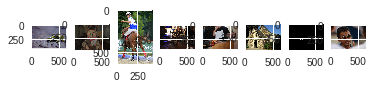

In [37]:

%matplotlib inline
plt.figure()
for i in range(8):
    image = mpimg.imread(os.path.join('./train/anger/',str(i+77)+'.jpg'))
    ax = plt.subplot(2, 8, i + 1)
    plt.imshow(image)
plt.show()
    




Read 



In [0]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [0]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0

    if model_name == "resnet":
        """ Resnet18
        """
        model_ft = models.resnet18(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "alexnet":
        """ Alexnet
        """
        model_ft = models.alexnet(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "vgg":
        """ VGG11_bn
        """
        model_ft = models.vgg11_bn(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "squeezenet":
        """ Squeezenet
        """
        model_ft = models.squeezenet1_0(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model_ft.num_classes = num_classes
        input_size = 224

    elif model_name == "densenet":
        """ Densenet
        """
        model_ft = models.densenet121(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "inception":
        """ Inception v3
        Be careful, expects (299,299) sized images and has auxiliary output
        """
        model_ft = models.inception_v3(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        # Handle the auxilary net
        num_ftrs = model_ft.AuxLogits.fc.in_features
        model_ft.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)
        # Handle the primary net
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs,num_classes)
        input_size = 299

    else:
        print("Invalid model name, exiting...")
        exit()

    return model_ft, input_size


                **LOAD VGGI6 MODEL**

In [40]:
# Initialize the model for this run
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [41]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'valid']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'valid']}

# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Initializing Datasets and Dataloaders...


In [0]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=False):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    if is_inception and phase == 'train':
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'valid':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [43]:
model_ft = model_ft.to(device)

# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

Params to learn:
	 fc.weight
	 fc.bias


In [50]:
# Setup the loss fxn
import time
import copy
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=(model_name=="inception"))

Epoch 0/1
----------
train Loss: 2.6905 Acc: 0.1704
valid Loss: 3.1540 Acc: 0.2343

Epoch 1/1
----------
train Loss: 2.6844 Acc: 0.1713
valid Loss: 3.1039 Acc: 0.2290

Training complete in 16m 51s
Best val Acc: 0.234330


In [0]:
!rm ./train/disgust/369.jpg

In [0]:
'''  

url = 'http://farm4.staticflickr.com/3100/2775941101_1aee6f408d_z.jpg'
image_name = './train/disgust/369.jpg'
r = requests.get(url)
with open(image_name, 'wb') as f:
  for chunk in r.iter_content():
    f.write(chunk)
    
    
'''    
